In [ ]:
'''
A Deep Learning Neural Network made from Fully Connected Layers
for the MNIST DATA for Hand Written Numbers
Made From SCRATCHZZZSSSXXX
'''

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd

In [ ]:
# train_csv = pd.read_csv("C:\\Users\\CastroPC\\Desktop\\train.csv")
# test_csv = pd.read_csv("C:\\Users\\CastroPC\\Desktop\\test.csv")

# train_DF = pd.DataFrame(train_csv)
# test_DF = pd.DataFrame(test_csv)


# TrainingDataTarget = []
# TrainingDataValue = []
# TestData = []

# for i in tqdm(range(len(train_DF))):
#    if train_DF.loc[i][0] == 0:
#        target = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 1:
#        target = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 2:
#        target = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 3:
#        target = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 4:
#        target = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 5:
#        target = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 6:
#        target = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
#    elif train_DF.loc[i][0] == 7:
#        target = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
#    elif train_DF.loc[i][0] == 8:
#        target = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
#    elif train_DF.loc[i][0] == 9:
#        target = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
#    TrainingDataValue.append(train_DF.loc[i][1:])
#    TrainingDataTarget.append(target)
# for i in tqdm(range(len(test_DF))):
#    TestData.append(np.array(test_DF.loc[i]))

# np.save("C:\\Users\\CastroPC\\Desktop\\TrainingDataTarget", TrainingDataTarget)
# np.save("C:\\Users\\CastroPC\\Desktop\\TrainingDataValue", TrainingDataValue)
# np.save("C:\\Users\\CastroPC\\Desktop\\TestData", TestData)

In [2]:
def stablesoftmax(x):
    """Compute the softmax of vector x in a numerically stable way."""
    shiftx = x - np.max(x)
    exps = np.exp(shiftx)
    return exps / np.sum(exps)

def dtanH(x):
    return 1 - np.tanh(x)**2

def tanH(x):
    return np.tanh(x)

def ReLU(x):
    return x * (x > 0)

def dReLU(x):
    return 1. * (x > 0)

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

def softmax_d(z):
    return softmax_broadcast(z) * (1 - softmax_broadcast(z))

def cross_ent(y, yhat):
    return -1 * np.sum(y * np.log(yhat+1e-16))

#def cross_entropy(predictions, targets, epsilon=1e-12):
#    """
#    Computes cross entropy between targets (encoded as one-hot vectors)
#    and predictions. 
#    Input: predictions (N, k) ndarray
#           targets (N, k) ndarray        
#    Returns: scalar
#    """
#    predictions = np.clip(predictions, epsilon, 1. - epsilon)
#    N = predictions.shape[0]
#    ce = -np.sum(targets*np.log(predictions+1e-9))/N
#    return ce

def cross_ent_d(y, yhat):
    return yhat - y

def softmax_broadcast(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] # necessary step to do broadcasting
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] # dito
    return e_x / div

In [3]:
# w1 = np.random.randn(784, 1200)
# b1 = np.random.randn(1, 1200)

# w2 = np.random.randn(1200, 1000)
# b2 = np.random.randn(1, 1000)

# w3 = np.random.randn(1000, 800)
# b3 = np.random.randn(1, 800)

# w4 = np.random.randn(800, 500)
# b4 = np.random.randn(1, 500)

# w5 = np.random.randn(500, 10)
# b5 = np.random.randn(1, 10)

In [6]:
w1 = np.load("weights1.npy")
w2 = np.load("weights2.npy")
w3 = np.load("weights3.npy")
w4 = np.load("weights4.npy")
w5 = np.load("weights5.npy")
b1 = np.load("bias1.npy")
b2 = np.load("bias2.npy")
b3 = np.load("bias3.npy")
b4 = np.load("bias4.npy")
b5 = np.load("bias5.npy")

In [15]:
iterations = 200
lr = 0.00001
costlist = []


In [13]:

TrainingDataTarget = np.load("C:\\Users\\CastroPC\\Desktop\\TrainingDataTarget.npy", allow_pickle=True)
TrainingDataValue = np.load("C:\\Users\\CastroPC\\Desktop\\TrainingDataValue.npy", allow_pickle=True)

100%|██████████| 200/200 [22:52<00:00,  6.86s/it]


[548973.387119159, 548429.9489227607, 547887.1055297195, 547344.8605390519, 546803.218164021, 546262.1832411082, 545721.7612339399, 545181.9582317963, 544642.7809424395, 544104.2366791158, 543566.3333417323, 543029.0793923021, 542492.4838249233, 541956.55613062, 541421.3062575106, 540886.7445668225, 540352.8817853493, 539819.7289549649, 539287.297379853, 538755.5985720796, 538224.6441961369, 537694.4460130387, 537165.0158245156, 536636.3654177806, 536108.5065113087, 535581.4507019785, 535055.2094138995, 534529.7938491604, 534005.2149407183, 533481.4833075786, 532958.6092124023, 532436.6025216396, 531915.4726682802, 531395.228617293, 530875.8788338277, 530357.4312542531, 529839.8932600935, 529323.2716549584, 528807.5726445166, 528292.8018196269, 527778.964142672, 527266.0639371848, 526754.1048808226, 526243.0900017325, 525733.0216783399, 525223.90164256, 524715.7309864196, 524208.5101720266, 523702.23904482997, 523196.9168500405, 522692.5422520924, 522189.11335696664, 521686.6277371885,

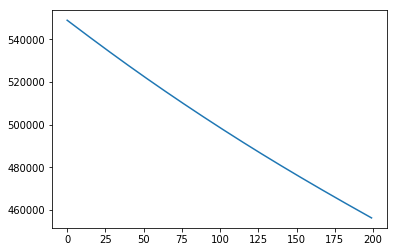

In [16]:
for i in tqdm(range(iterations)):

    InputData1 = TrainingDataValue
    TargetData1 = TrainingDataTarget

    z1 = np.dot(InputData1, w1) + b1
    a1 = ReLU(z1)
    #a1 - 42000 x 1000  

    z2 = np.dot(a1, w2) + b2
    a2 = ReLU(z2)
    #a2 - 42000 x 1000
    
    z3 = np.dot(a2, w3) + b3
    a3 = ReLU(z3)
    #a3 - 42000 x 800

    z4 = np.dot(a3, w4) + b4
    a4 = tanH(z4)
    #a4 - 42000 x 500

    z5 = np.dot(a4, w5) + b5
    a5 = softmax_broadcast(z5)
    #a5 - 42000 x 10

    cost = cross_ent(TargetData1, a5)
    costlist.append(cost)

    #backprop
    dcda5 = cross_ent_d(TargetData1, a5)
    da5dz5 = softmax_d(z5)
    dz5dw5 = a4

    dz5da4 = w5
    da4dz4 = dtanH(z4)
    dz4dw4 = a3

    dz4a3 = w4
    da3dz3 = dReLU(z3)
    dz3dw3 = a2

    dz3da2 = w3
    da2dz2 = dReLU(z2)
    dz2dw2 = a1

    dz2da1 = w2
    da1dz1 = dReLU(z1)
    dz1dw1 = InputData1

    dw5 = dcda5 * da5dz5
    db5 = np.sum(dw5, axis=0, keepdims=True)
    w5 = w5 - lr * np.dot(dz5dw5.T, dw5)
    b5 = b5 - lr * db5

    #print(w5)

    dw4 = np.dot(dw5, dz5da4.T) * da4dz4
    db4 = np.sum(dw4, axis=0, keepdims=True)
    w4 = w4 - lr * np.dot(dz4dw4.T, dw4)
    b4 = b4 - lr * db4

    #print(w4)

    dw3 = np.dot(dw4, dz4a3.T) * da3dz3
    db3 = np.sum(dw3, axis=0, keepdims=True)
    w3 = w3 - lr * np.dot(dz3dw3.T, dw3)
    b3 = b3 - lr * db3

    #print(w3)

    dw2 = np.dot(dw3, dz3da2.T) * da2dz2
    db2 = np.sum(dw2, axis=0, keepdims=True)
    w2 = w2 - lr * np.dot(dz2dw2.T, dw2)
    b2 = b2 - lr * db2

    #print(w2)

    dw1 = np.dot(dw2, dz2da1.T) * da1dz1
    db1 = np.sum(dw1, axis=0, keepdims=True)
    w1 = w1 - lr * np.dot(dz1dw1.T, dw1)
    b1 = b1 - lr * db1

np.save("weights1", w1)
np.save("weights2", w2)
np.save("weights3", w3)
np.save("weights4", w4)
np.save("weights5", w5)
np.save("bias1", b1)
np.save("bias2", b2)
np.save("bias3", b3)
np.save("bias4", b4)
np.save("bias5", b5)
print(costlist)
plt.plot(costlist)
plt.show()
